In [9]:
import keras
import numpy as np

In [2]:
from keras.datasets import imdb

In [3]:
#keep most occuring words in dataset
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 2s 0us/step


In [4]:
train_labels[0]

1

In [5]:
max([max(sequence)for sequence in train_data])

9999

In [6]:
#word_index is a dict mapping words to an integer index
word_index=imdb.get_word_index()
#reverse it, map int indices to word
reverse_word_index=dict([(value,key) for (key,value)in word_index.items()])

decode_review=''.join([reverse_word_index.get(i-3,'?')for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


In [7]:
decode_review

"?thisfilmwasjustbrilliantcastinglocationscenerystorydirectioneveryone'sreallysuitedtheparttheyplayedandyoucouldjustimaginebeingthererobert?isanamazingactorandnowthesamebeingdirector?fathercamefromthesamescottishislandasmyselfsoilovedthefacttherewasarealconnectionwiththisfilmthewittyremarksthroughoutthefilmweregreatitwasjustbrilliantsomuchthatiboughtthefilmassoonasitwasreleasedfor?andwouldrecommendittoeveryonetowatchandtheflyfishingwasamazingreallycriedattheenditwassosadandyouknowwhattheysayifyoucryatafilmitmusthavebeengoodandthisdefinitelywasalso?tothetwolittleboy'sthatplayedthe?ofnormanandpaultheywerejustbrilliantchildrenareoftenleftoutofthe?listithinkbecausethestarsthatplaythemallgrownuparesuchabigprofileforthewholefilmbutthesechildrenareamazingandshouldbepraisedforwhattheyhavedonedon'tyouthinkthewholestorywassolovelybecauseitwastrueandwassomeone'slifeafterallthatwassharedwithusall"

In [11]:
def vectorize_sequences(sequences,dimensions=10000):
    results=np.zeros((len(sequences),dimensions))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1.
    return results
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)


In [12]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [13]:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [14]:
from keras import models
from keras import layers

In [16]:
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [17]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',
             metrics=['accuracy'])

In [18]:
from keras import optimizers
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss=losses.binary_crossentropy,metrics=[metrics.binary_accuracy])

In [24]:
# Validating our approach
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [25]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 191us/step - loss: 0.5084 - binary_accuracy: 0.7813 - val_loss: 0.3797 - val_binary_accuracy: 0.8684
Epoch 2/20
15000/15000 [==============================] - 2s 142us/step - loss: 0.3004 - binary_accuracy: 0.9047 - val_loss: 0.3004 - val_binary_accuracy: 0.8897
Epoch 3/20
15000/15000 [==============================] - 2s 143us/step - loss: 0.2179 - binary_accuracy: 0.9285 - val_loss: 0.3085 - val_binary_accuracy: 0.8711
Epoch 4/20
15000/15000 [==============================] - 2s 144us/step - loss: 0.1750 - binary_accuracy: 0.9437 - val_loss: 0.2840 - val_binary_accuracy: 0.8832
Epoch 5/20
15000/15000 [==============================] - 2s 147us/step - loss: 0.1427 - binary_accuracy: 0.9543 - val_loss: 0.2841 - val_binary_accuracy: 0.8872
Epoch 6/20
15000/15000 [==============================] - 2s 149us/step - loss: 0.1150 - binary_accuracy: 0.9650 - val_loss: 0.3166 - val_bi

In [ ]:
history_dict=history.history
history_dict.keys()

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

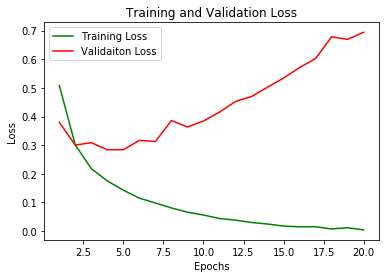

In [30]:
acc=history.history['binary_accuracy']
val_acc=history.history['val_binary_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)
plt.plot(epochs,loss,'g',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validaiton Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss=losses.binary_crossentropy,metrics=[metrics.binary_accuracy])

In [33]:
model.predict(x_test)

array([[0.5091613 ],
       [0.49980375],
       [0.4767581 ],
       ...,
       [0.49816516],
       [0.503959  ],
       [0.5235529 ]], dtype=float32)